<a href="https://colab.research.google.com/github/AbiramiMuthu/TensorFlow-CNN-DigitRecognition/blob/main/TF_CNN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries



In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.datasets import mnist


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load Data

In [9]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
np.max(x_train)

255

In [13]:
#Normalize the values b/w 0-1

x_train=x_train/255.0
x_test=x_test/255.0

In [14]:
np.max(x_train)

1.0

In [15]:
x_train[0].shape

(60000, 28, 28)

In [16]:
#we need to convert to 3 dim bcoz CNN will accept 3-dim values
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [18]:
x_train[0].shape

(28, 28, 1)

In [19]:
input_shape=x_train[0].shape

### Build the Model

In [25]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

## Compile the Model

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 145s 307ms/step - loss: 0.2404 - accuracy: 0.9258 - val_loss: 0.0555 - val_accuracy: 0.9815
Epoch 2/10
469/469 [==============================] - 143s 305ms/step - loss: 0.0859 - accuracy: 0.9743 - val_loss: 0.0398 - val_accuracy: 0.9865
Epoch 3/10
469/469 [==============================] - 142s 304ms/step - loss: 0.0611 - accuracy: 0.9814 - val_loss: 0.0390 - val_accuracy: 0.9879
Epoch 4/10
469/469 [==============================] - 142s 302ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0305 - val_accuracy: 0.9908
Epoch 5/10
469/469 [==============================] - 143s 305ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0271 - val_accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 141s 300ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0294 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 142s 304ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0227 -

## Plotting

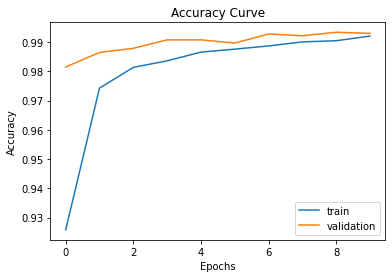

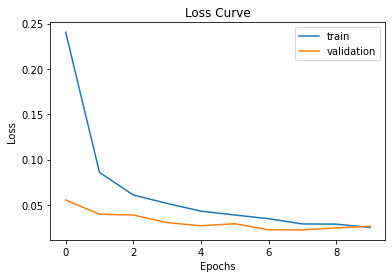

In [30]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend(["train","validation"])
plt.show()


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend(["train","validation"])
plt.show()